<a href="https://colab.research.google.com/github/GoAshim/Deep-Learning-with-TensorFlow/blob/main/03_Regression_Problem_with_TensorFlow_Predict_Premium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving Regression Problem with Neural Networks using TensorFlow
In this project we will use neural networks in TensorFlow with a simple dataset to predict a numerical variable (or target feature) based on one or more other variables (input features). The scope of this project is to learn the fundamentals of neural network in tensorflow by going through
the steps to build and train the model and use the model to predict result with unknown data.

In [24]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


# Check version of tensorflow
tf.__version__

'2.15.0'

### Loading data
In this project we will import the medical insurance cost data of 1338 random individuals. This data is publicly available in GitHub in form of a comma separated value (CSV) file.

In [25]:
# Load the data
ins = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Data Dictionary
The data has 1338 records with 7 column or features. The features are -

* **age**: Age of primary beneficiary
* **sex**: Gender, female or male
* **bmi**: Body mass index, providing an understanding of body weights that are relatively high or low relative to height
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Primary beneficiary a smoker, yes or no.
* **region**: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges**: Individual medical insurance premium billed by health insurance.

### Exploratory Data Analysis
In this module we will perform following tasks -
* Review the attributes of the dataframe
* Analyze and plot values in the numeric columns
* Analyze values in the non-numeric / object type columns


In [26]:
# Shape of the dataframe
print("Number of rows / records: ", ins.shape[0])
print("Number of columns / features: ", ins.shape[1])

Number of rows / records:  1338
Number of columns / features:  7


In [27]:
# Check the datatypes of each columns of the dataframe
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [28]:
# Review statistical analysis of the numeric columns, such as age, sex, children and charges
ins.select_dtypes(include=np.number).describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


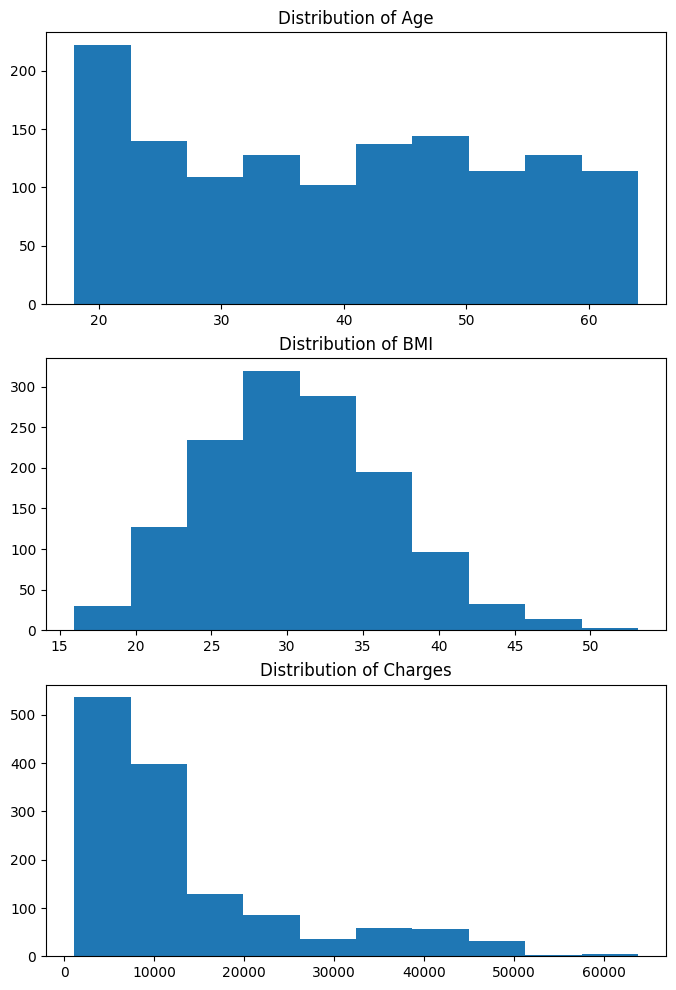

In [29]:
# Plot histogram of age, bmi and charges features to see the distribution and find any outlier.

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

ax[0].hist(ins['age'])
ax[0].set(title="Distribution of Age")
ax[1].hist(ins['bmi'])
ax[1].set(title="Distribution of BMI")
ax[2].hist(ins['charges'])
ax[2].set(title="Distribution of Charges");

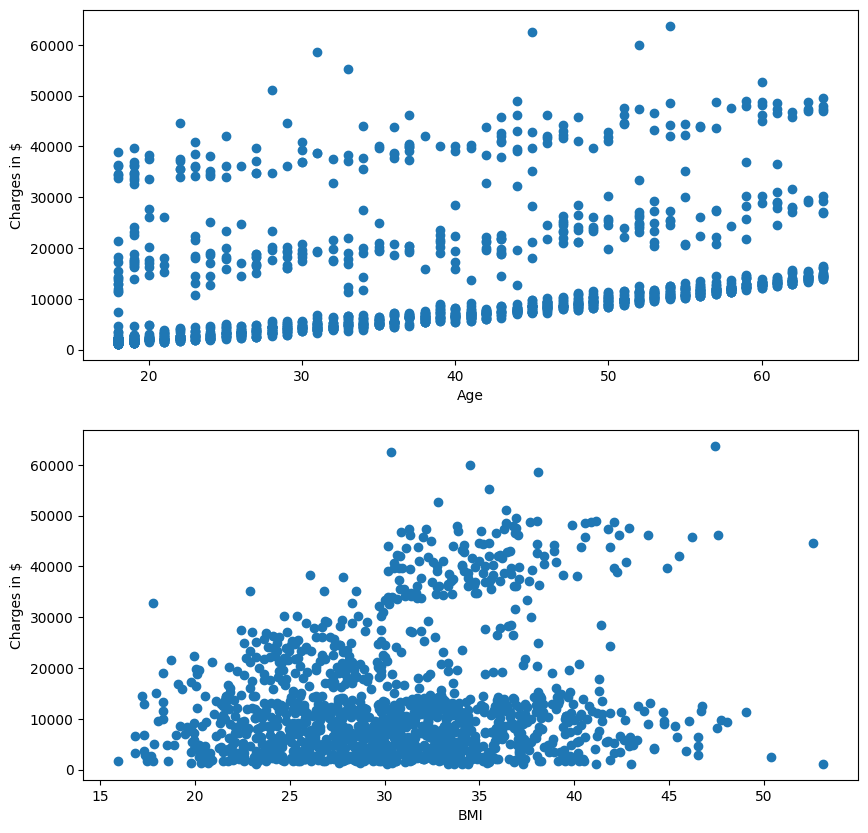

In [30]:
# Let's plot to see any relationship between age vs charges and bmi vs charges.

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].scatter(ins['age'], ins['charges'])
ax[0].set(xlabel="Age", ylabel="Charges in $")
ax[1].scatter(ins['bmi'], ins['charges'])
ax[1].set(xlabel="BMI", ylabel="Charges in $");

In [31]:
# Check the values in the non-numeric columns
catcols = ins.select_dtypes(exclude=np.number).columns
for i in catcols:
  print("Distribution of values in column ", i)
  print(ins[i].value_counts())
  print()

Distribution of values in column  sex
male      676
female    662
Name: sex, dtype: int64

Distribution of values in column  smoker
no     1064
yes     274
Name: smoker, dtype: int64

Distribution of values in column  region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



### Feature Engineering
In this module we will perform following tasks -
* Check and handle if the data has any missing value.
* Convert non-numeric to numeric columns (OneHot encoding)


In [32]:
# Check if the original dataframe has any missing values.
# Based on the result of this code there is no missing values in the original dataframe
ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
# From the above code we see that all 3 categorical columns have few distinct values, so we can safely apply OneHot encoding.

ins_oh = pd.get_dummies(ins)
ins_oh.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### Prepare Data for Neural Network Model
In this module we will perform following tasks -
* Split dataset into features (X) and label (y).
* Split dataset into training and test.

In [34]:
# Create feature dataset (X)
X = ins_oh.drop(columns=['charges'])

# Review the feature dataset
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [35]:
# Create the label dataset
y = ins_oh['charges']

# Review the label dataset
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [36]:
# Split the feature and label dataset into training and test

# Import necessary library
from sklearn.model_selection import train_test_split


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [37]:
# Check the record count of train and test sets

len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [38]:
# Review the training feature set

X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [39]:
# Review the test feature set
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0


### Creating deep learning model with TensorFlow
We are going to run the following steps -
* **Creating the model** - We will create the neural network model by defining the following.
  * Input layer
  * Output layer
  * Hidden layer(s) - One or more layers in between the input and output layer.
* **Compiling the model** - We will compile the model by defining the following of a neural network model.
  * Loss function - This tells our model how much wrong it is.
  * Optimizer - This tells our model how to reduce the loss, in other words how to improve it's performance.
  * Evaluation metrics - Helps to evaluate performance of the model.
* **Fitting the model** - We will run the model with data and let it find pattern between feature(s) and target. Here we will specify -
  * Epoch - The number of times the model will run on data to find the pattern.

In [41]:
# Set the random seed
tf.random.set_seed(42)

# # Create a sequential model and one dense layer
ins1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# # Compile the model
ins1.compile(loss = tf.keras.losses.mae, # mae = Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model
ins1.fit(X_train, y_train, epochs=100, verbose=0)

In [43]:
# Evaluate our model with the test data
ins1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6171.4634 - mae: 6171.4634


[6171.46337890625, 6171.46337890625]

In [ ]:
# To better understand the evaluation result above, lets calculate the mean and median of the price (the label) of our test dataset
print("Mean value of price in the test dataset: ", y_test.mean())
print("Median value of price in the test dataset: ", y_test.median())

By evaluating our first neural network model on our test dataset we get the **Mean Absolute Error (MAE)** of 6171, meaning our model will be off on average by 5840 to predict the insurance charge.

So how do we know if our model is good or in other words whether it's predicting the unknown label close enough.

To do that, we checked the central tendency of the test dataset labels and found the mean (or average) of charges is 12968 and the median (or mid point) of charges is 8488.

So if a person has insurance charge of $8,488 in reality, our model may predict as low as 2317 (8488 - 6171) or as high as 14,659 (8488 + 6171). So it's obvious that our first model needs further tuning to improve it's performance.



### Hyperparameter Tuning
In this section we will tune few of the hyperparameters of the model and see if those tuning help improve model performance.

In [46]:
# We add a dense layer with 100 nurons and also change the optimiser from SGD to Adam

# Create random seed
tf.random.set_seed(42)

# Create the model
ins2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
ins2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# Fit the model with training data
ins2.fit(X_train, y_train, epochs=100, verbose=0)

In [49]:
# Evaluate the model on test data and compare that against the first model
print("Evaluation result of model 2:")
ins2.evaluate(X_test, y_test)
print("Evaluation result of model 1:")
ins1.evaluate(X_test, y_test)

Evaluation result of model 2:
9/9 [==============================] - 0s 2ms/step - loss: 4724.9238 - mae: 4724.9238
Evaluation result of model 1:
9/9 [==============================] - 0s 2ms/step - loss: 6171.4634 - mae: 6171.4634


[6171.46337890625, 6171.46337890625]

So we see that adding an additional layer to the model as well as changing the optimizer has reduced the loss from 6171 to 4725, which is an improvement of 25%.